Feature shape: (1200, 128, 128, 1)
Label shape: (1200, 15)

Classification Report:
               precision    recall  f1-score   support

     Airplane       0.60      0.56      0.58        16
         Book       0.62      0.31      0.42        16
          Cup       0.67      0.62      0.65        16
     Envelope       0.74      0.88      0.80        16
          Fan       0.75      0.38      0.50        16
         Fork       0.45      0.62      0.53        16
          Hat       0.43      0.56      0.49        16
          Key       0.32      0.56      0.41        16
       Laptop       0.64      0.56      0.60        16
         Leaf       0.36      0.31      0.33        16
         Moon       0.41      0.75      0.53        16
        Pizza       0.80      0.50      0.62        16
      T-shirt       1.00      0.69      0.81        16
Traffic Light       0.50      0.31      0.38        16
   Wine Glass       0.81      0.81      0.81        16

     accuracy                      

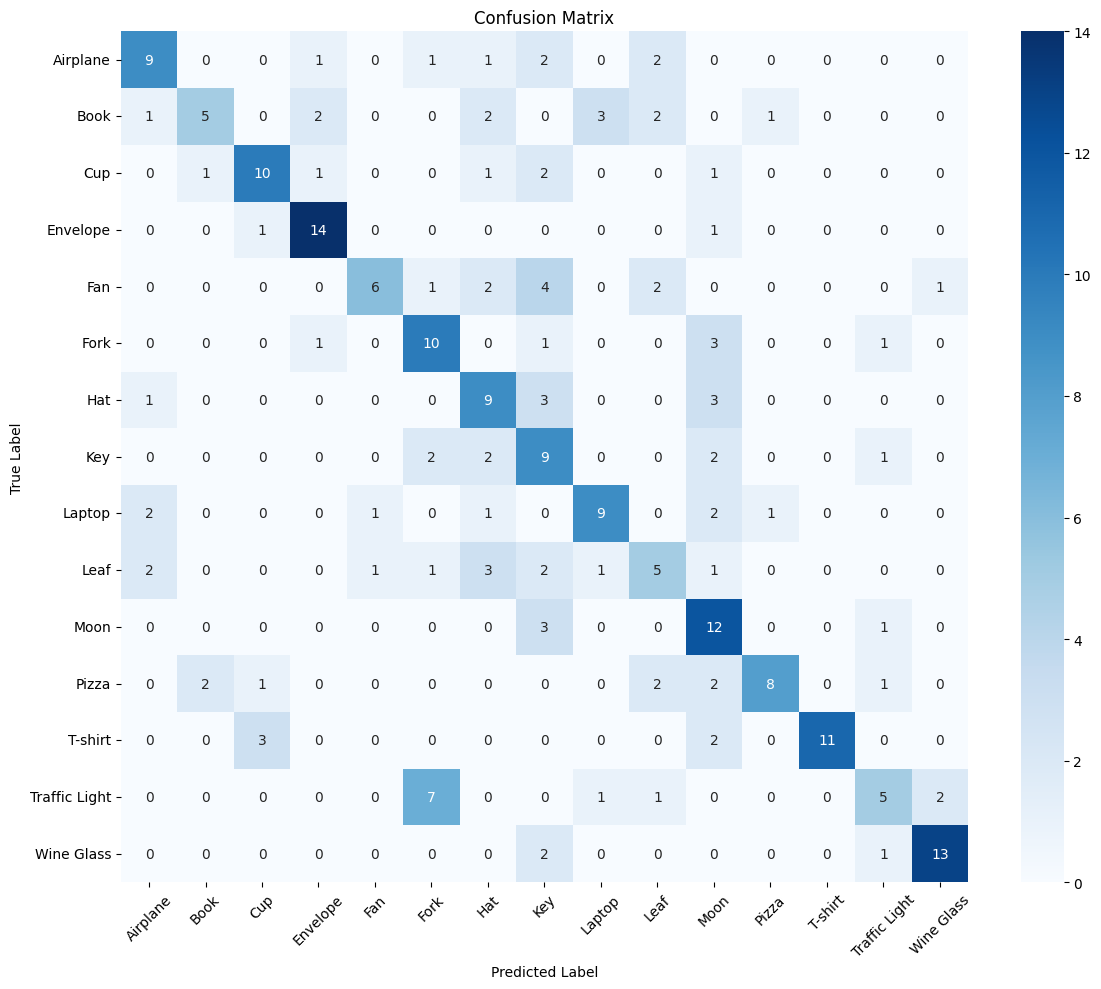

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# --- Step 1: Load the data ---
X = np.load("preprocessed_images.npy")       # Shape: (1200, 128, 128, 1)
y = np.load("preprocessed_labels.npy")       # Shape: (1200, 15)

print("Feature shape:", X.shape)
print("Label shape:", y.shape)

# --- Step 2: Custom label dictionary ---
label_dict = {
    0: "Airplane", 1: "Book", 2: "Cup", 3: "Envelope", 4: "Fan",
    5: "Fork", 6: "Hat", 7: "Key", 8: "Laptop", 9: "Leaf",
    10: "Moon", 11: "Pizza", 12: "T-shirt", 13: "Traffic Light", 14: "Wine Glass"
}

# --- Step 3: Reshape & preprocess features ---
X = X.reshape(X.shape[0], -1)  # Flatten from (1200, 128, 128, 1) to (1200, 16384)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 4: Convert one-hot labels to class indices ---
if len(y.shape) > 1 and y.shape[1] > 1:
    y = np.argmax(y, axis=1)

# --- Step 5: Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# --- Step 6: Train SVM ---
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

# --- Step 7: Predict & Evaluate ---
y_pred = svm.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=list(label_dict.values())))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# --- Step 8: Confusion Matrix ---
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_dict.values(),
            yticklabels=label_dict.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
